<a href="https://colab.research.google.com/github/Javsk891/proyecto-integrador-2/blob/main/RNN_PM2_5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Nueronales Recurrentes (RNN) para el Forecasting de PM2.5 (Medellín)

## Introducción:

Este notebook de Colab utiliza Redes Neuronales Recurrentes (RNN) para realizar el pronóstico de la variable PM2.5 en la ciudad de Medellín. Las RNN son un tipo de red neuronal especialmente diseñada para modelar secuencias de datos, lo que las hace particularmente efectivas en tareas de predicción temporal, como el forecasting de la calidad del aire.

Las redes neuronales son un modelo computacional inspirado en el funcionamiento del cerebro humano. En el contexto de predicciones, las redes neuronales aprenden patrones complejos en los datos de entrada y son capaces de generalizar esos patrones para hacer predicciones sobre nuevos datos. Las RNN, en particular, son capaces de recordar información de entradas anteriores a medida que procesan nuevas entradas, lo que las hace especialmente adecuadas para secuencias de datos, como series temporales.

En el caso específico de la ciudad de Medellín, la calidad del aire es una preocupación importante debido a diversos factores, como el tráfico vehicular, la industria y las condiciones geográficas. El PM2.5 es una medida de las partículas finas en suspensión en el aire, las cuales pueden tener un impacto significativo en la salud humana al ser inhaladas. Por lo tanto, realizar pronósticos precisos sobre los niveles de PM2.5 es crucial para implementar medidas de control y mitigación que contribuyan a mejorar la calidad del aire y, en última instancia, la calidad de vida de los habitantes de la ciudad.

En este notebook, exploraremos cómo utilizar RNN para predecir los niveles de PM2.5 en Medellín, aprovechando la capacidad de estas redes para capturar patrones temporales en los datos y proporcionar pronósticos precisos que puedan ayudar en la toma de decisiones para mejorar la calidad del aire en la ciudad.

# Importamos las librerias necesarias para dessarrollar el modelo

En el desarrollo del modelo de Redes Neuronales Recurrentes (RNN), se han importado varias bibliotecas esenciales para el análisis de datos, la construcción del modelo y la visualización de resultados. Entre estas bibliotecas se encuentran pandas, numpy, seaborn y matplotlib para la manipulación y visualización de datos; statsmodels para el análisis estadístico y la modelización de series temporales; y sklearn para la evaluación del rendimiento del modelo, incluyendo métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y la puntuación R-cuadrado (R²).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install sgt
import sgt

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller, kpss

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense


## Carga de los datos para el modelo
El dataset utilizado en este estudio se obtuvo de la estación El Volador del Sistema de Alerta Temprana de Medellín para la Calidad del Aire (SIATA), ubicada en la ciudad de Medellín, Colombia. La estación El Volador es una de las múltiples estaciones de monitoreo de la calidad del aire distribuidas en toda la ciudad, diseñadas para medir y registrar diversos contaminantes atmosféricos, incluyendo partículas en suspensión de tamaño menor a 2.5 micrómetros (PM2.5), óxidos de nitrógeno (NOx), ozono (O3), entre otros.

La estación El Volador se encuentra ubicada en el nororiente de la ciudad, en el Cerro El Volador, una elevación natural que forma parte del sistema montañoso que rodea Medellín. Esta ubicación estratégica proporciona un punto de observación importante para monitorear la calidad del aire en una zona que puede verse afectada por diversos factores, como el tráfico vehicular, la actividad industrial y las condiciones climáticas locales. Además, la estación El Volador se encuentra en una ubicación elevada, lo que puede influir en la dispersión de contaminantes y en la calidad del aire en áreas circundantes. El dataset obtenido de esta estación proporciona una valiosa fuente de datos para analizar y comprender la evolución de la calidad del aire en la ciudad de Medellín, así como para desarrollar modelos de predicción que contribuyan a gestionar y mejorar la calidad del aire en la región.



In [ ]:
# Importar dataset desde Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Carga el archivo CSV
data = pd.read_csv("/content/gdrive/My Drive/volador_ventana.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Fecha,Nombre de la estación,Latitud,Longitud,Nombre del municipio,CO,Dirección del Viento,Humedad Relativa,...,PST,Precipitación Líquida,Presión Atmosférica,Radiación Solar Global,SO2,Temperatura,Temperatura a 10 m,Temperatura a 2 m,Velocidad del Viento,Año
0,116204,116204,2012-09-18 00:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.5,642.265200,0.0,NaN,NaN,20.91058,NaN,0.0,2012
1,116220,116220,2012-09-18 01:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.0,641.204163,0.0,NaN,NaN,20.91058,NaN,0.0,2012
2,116236,116236,2012-09-18 02:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.0,641.870900,0.0,NaN,NaN,20.91058,NaN,0.0,2012
3,116252,116252,2012-09-18 03:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.1,641.633400,0.0,NaN,NaN,20.91058,NaN,0.0,2012
4,116268,116268,2012-09-18 04:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.0,641.612700,0.0,NaN,NaN,20.91058,NaN,0.0,2012


In [ ]:
df2 = data[['Fecha', 'PM2.5']]
# Convertir la columna 'Fecha' al formato datetime y ponerla como indice del dataframe
df2['Fecha'] = pd.to_datetime(df2['Fecha'])
df2 = df2.set_index('Fecha')

# Crear una Serie para 'PM2.5' con 'Fecha' como índice
# Ahora puedes trabajar con pm25_series que tiene índice de fecha y hora.
df2.head()

<ipython-input-4-4089e4e7e182>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Fecha'] = pd.to_datetime(df2['Fecha'])


,PM2.5
Fecha,
2012-09-18 00:00:00,15.915789
2012-09-18 01:00:00,15.922298
2012-09-18 02:00:00,15.928807
2012-09-18 03:00:00,15.935316
2012-09-18 04:00:00,15.941825


In [ ]:
# Seleccionamos el perido de tiempo en que se realiza el entrenamiento, validación y testeo del modelo
data = data.loc[(data['Fecha'] >= '2013-01-01 00:00:00') & (data['Fecha'] <= '2015-12-31 23:00:00')]

In [ ]:
# Selección de las columnas que seutilizaran para el forecasting de PM2.5
data = data[['Fecha', 'PM2.5']]
data.head()

,Fecha,PM2.5
2330,2013-01-01 00:00:00,34.0
2331,2013-01-01 01:00:00,49.0
2332,2013-01-01 02:00:00,69.0
2333,2013-01-01 03:00:00,62.0
2334,2013-01-01 04:00:00,55.0


In [ ]:
# Convertir la columna 'PM2.5' a una serie de tiempo
data1 = pd.Series(data['PM2.5'])
# Convertir la columna 'Fecha' al formato de fecha correcto
data2 = pd.to_datetime(data['Fecha'])

#Una breve exploración de los datos

Es importante visualizar la variable PM2.5 como serie de tiempo porque nos permite comprender su comportamiento a lo largo del tiempo y detectar patrones, tendencias y estacionalidades que pueden no ser evidentes en un análisis estático. Al representar los datos de PM2.5 en forma de serie temporal, podemos identificar cambios en los niveles de contaminación a lo largo del día, la semana o el año, así como eventos específicos que puedan influir en la calidad del aire, como picos de contaminación durante horas pico de tráfico o fenómenos meteorológicos extremos.

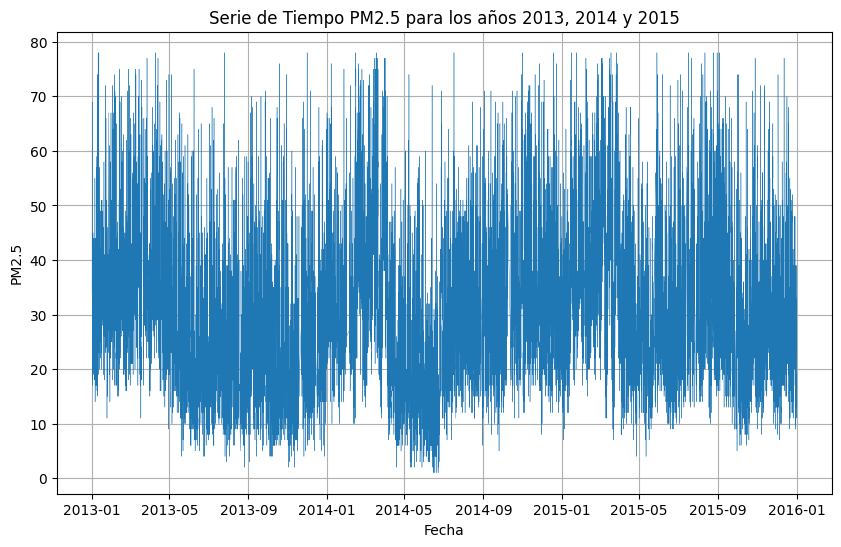

In [ ]:
# Graficar la serie de tiempo con fechas en el eje x
plt.figure(figsize=(10, 6))
plt.plot(data2, data1, linewidth=0.3)
plt.title('Serie de Tiempo PM2.5 para los años 2013, 2014 y 2015')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

#Media Movil

La media móvil es importante en este proceso porque ayuda a identificar estacionariedad en los datos. Al suavizar las fluctuaciones aleatorias, la media móvil puede revelar patrones de comportamiento que indican si la serie temporal exhibe estacionariedad, es decir, si la media y la varianza de la serie son constantes a lo largo del tiempo. Esto es crucial para el análisis de series temporales y el modelado de datos, ya que la estacionariedad es un requisito común para muchos modelos estadísticos y de predicción. La identificación de estacionariedad proporciona una base sólida para la construcción de modelos precisos y confiables.

In [ ]:
# Calcula la media móvil y la desviación estándar móvil
rolling_mean = data1.rolling(4).mean()
rolling_std = data1.rolling(4).std()
rolling_std

2330           NaN
2331           NaN
2332           NaN
2333     15.416441
2334      8.655441
           ...    
28114     2.753785
28115     3.304038
28116     5.560276
28117     4.112988
28118     2.943920
Name: PM2.5, Length: 25789, dtype: float64

# Descomposición estacional

La descomposición estacional divide una serie temporal en sus componentes básicas: tendencia, estacionalidad y residuo. Después de la descomposición, trazar las componentes descompuestas junto con la serie original permite visualizar patrones, tendencias y ciclos estacionales en los datos, facilitando la comprensión de la estructura temporal y la evaluación del modelo.

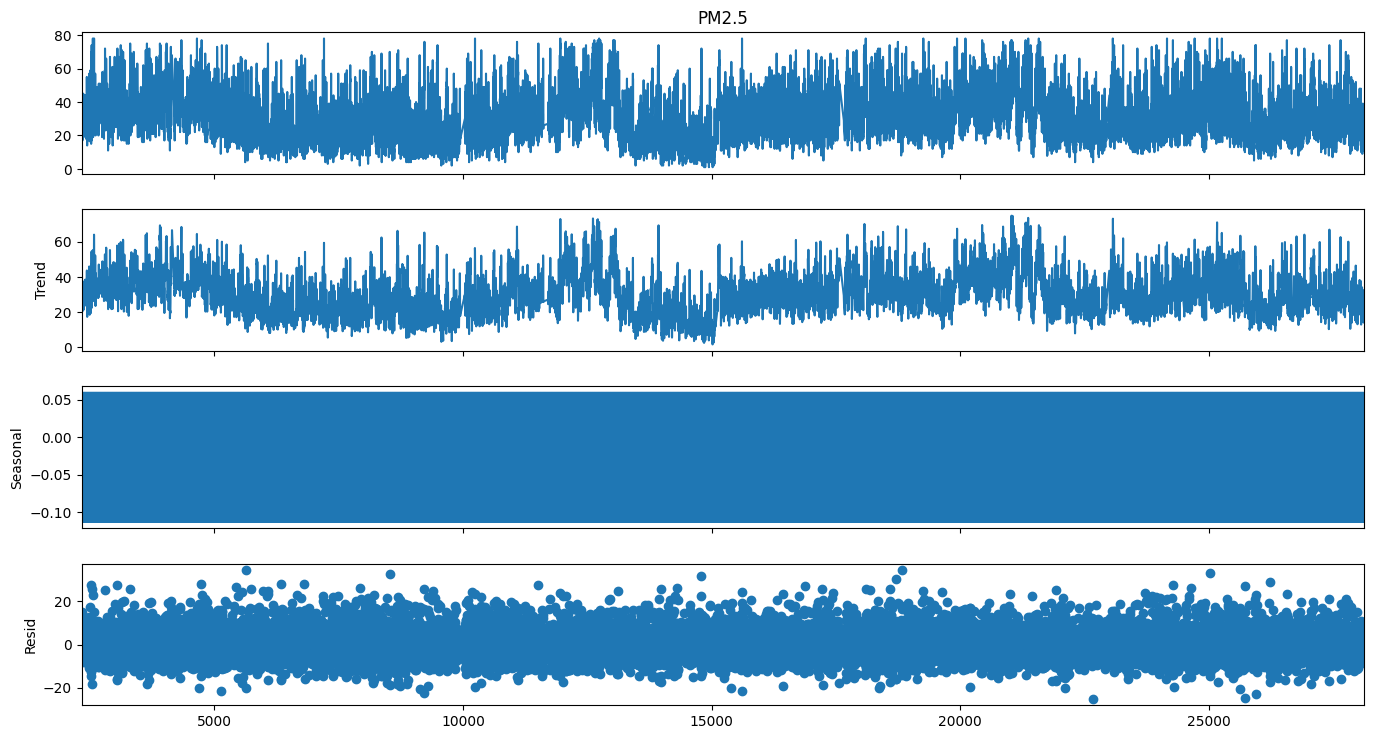

In [ ]:
# Realizar la descomposición estacional
decomp = sm.tsa.seasonal_decompose(data1, period=5)  # Período establecido en 7 días

# Trazar los componentes de la descomposición
fig = decomp.plot()
fig.set_size_inches(15, 8)
plt.show()

In [ ]:
# Estacionalidad
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 40, ax = axes[0])
    sgt.plot_pacf(series, zero = False, lags = 40, ax = axes[1])

    plt.show()

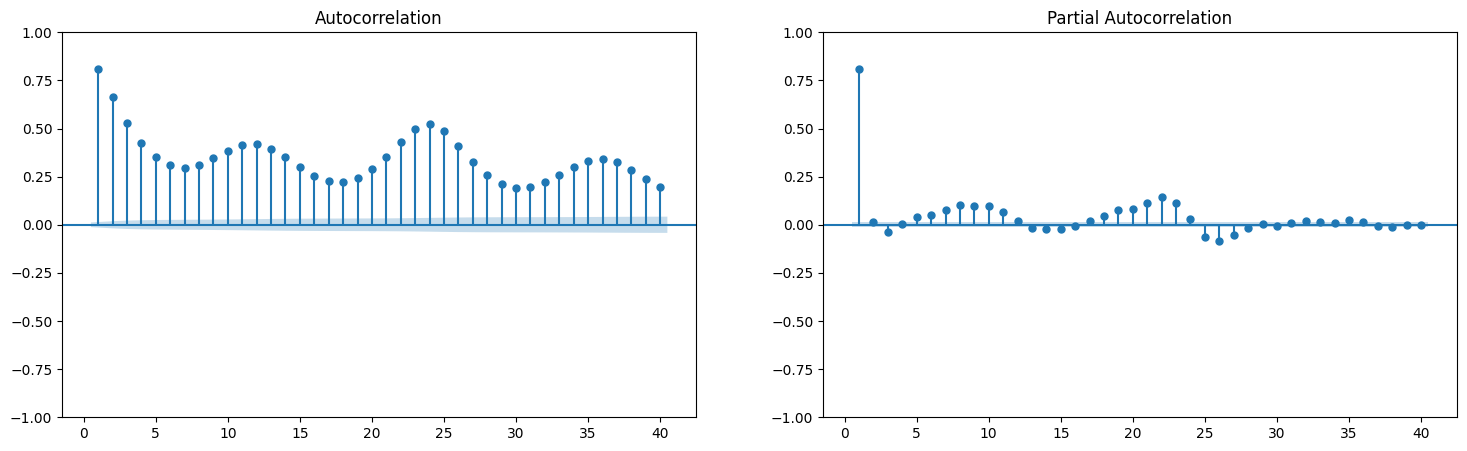

In [ ]:
plot_acf_pacf(data['PM2.5'])

In [ ]:
# Probamos los Dickey-Fuller para saber si hay estacionalidad
result = adfuller(data['PM2.5'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")

ADF Statistic: -10.525932928914482
p-value: 9.417862999970751e-19
Critical Values: {'1%': -3.430604087271533, '5%': -2.8616522990231905, '10%': -2.566829773461828}
La serie es estacionaria.


Una serie se considera estacionaria cuando el estadístico ADF (Augmented Dickey-Fuller) es menor que los valores críticos para un nivel de significancia dado (generalmente 5%), lo que indica que la serie tiene raíz unitaria y es estacionaria. Además, el p-value asociado con el estadístico ADF debe ser significativamente menor que el nivel de significancia (usualmente 0.05), lo que indica una fuerte evidencia en contra de la hipótesis nula de no estacionariedad. En resumen, una serie se considera estacionaria si el estadístico ADF es menor que los valores críticos y el p-value es menor que el nivel de significancia especificado.

# Predicción mediante modelo de RNN

Hacer la columna 'Fecha' como el índice de la serie de tiempo permite un fácil acceso y manipulación de los datos temporales, facilitando el análisis y la visualización de tendencias y patrones a lo largo del tiempo sin necesidad de reindexar los datos. Además, muchas funciones de análisis de series temporales requieren que el índice sea de tipo datetime para funcionar correctamente.

In [ ]:
# Pasar la columna 'Fecha' al formato datetime y ponerla como indice del dataframe
data['Fecha'] = pd.to_datetime(data['Fecha'])
data = data.set_index('Fecha')

#Separación del dataset en entrenamiento, validación y testeo (train, val y test)

En RNN, la separación del dataset en conjuntos de entrenamiento, validación y prueba es crucial para evaluar la capacidad del modelo de generalizar a datos no vistos y evitar el sobreajuste. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, el conjunto de validación se utiliza para ajustar los hiperparámetros y evitar el sobreajuste, y el conjunto de prueba se utiliza para evaluar el rendimiento final del modelo en datos no vistos. Esto ayuda a garantizar que el modelo sea capaz de generalizar bien a nuevos datos y que sus resultados sean confiables y reproducibles en diferentes conjuntos de datos.

In [ ]:
# Dividir en conjuntos de entrenamiento, validación y prueba
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
test_size = int(len(data)) - train_size - val_size

train_data, val_data, test_data = data[:train_size], data[train_size:train_size+val_size], data[train_size+val_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data.iloc[i:i+seq_length].values) # Use iloc to access rows by position
        y.append(data.iloc[i+seq_length].values) # Use iloc to access rows by position
    return np.array(X), np.array(y)

# Definir la longitud de la secuencia
seq_length = 5

# Crear secuencias de entrenamiento
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Imprimir las formas de los conjuntos de datos de entrenamiento, validación y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (18047, 5, 1)
Forma de y_train: (18047, 1)
Forma de X_val: (3863, 5, 1)
Forma de y_val: (3863, 1)
Forma de X_test: (3864, 5, 1)
Forma de y_test: (3864, 1)


#Definición, compilación y entrenamiento del modelo

En la fase de definición del modelo, se establece la arquitectura de la red neuronal y se definen los hiperparámetros. Luego, en la fase de compilación, se especifica la función de pérdida, el optimizador y las métricas de evaluación. Finalmente, en la fase de entrenamiento, se ajustan los pesos de la red neuronal utilizando los datos de entrenamiento, con el objetivo de minimizar la pérdida definida. Una vez completado el entrenamiento, el modelo está listo para realizar predicciones sobre nuevos datos.

In [ ]:
# Definir el modelo de RNN
model_rnn = Sequential([
    SimpleRNN(10, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history_rnn = model_rnn.fit(X_train, y_train, epochs=30, batch_size=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/30
3610/3610 [==============================] - 14s 3ms/step - loss: 363.4230 - val_loss: 192.1435
Epoch 2/30
3610/3610 [==============================] - 17s 5ms/step - loss: 93.2426 - val_loss: 93.5485
Epoch 3/30
3610/3610 [==============================] - 31s 8ms/step - loss: 68.7196 - val_loss: 74.0617
Epoch 4/30
3610/3610 [==============================] - 13s 4ms/step - loss: 64.7387 - val_loss: 67.3684
Epoch 5/30
3610/3610 [==============================] - 13s 4ms/step - loss: 63.6252 - val_loss: 69.3590
Epoch 6/30
3610/3610 [==============================] - 14s 4ms/step - loss: 63.0154 - val_loss: 66.8344
Epoch 7/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.7177 - val_loss: 63.5177
Epoch 8/30
3610/3610 [==============================] - 13s 4ms/step - loss: 62.6245 - val_loss: 62.4896
Epoch 9/30
3610/3610 [==============================] - 13s 4ms/step - loss: 62.3948 - val_loss: 62.0294
Epoch 10/30
3610/3610 [==============================


#Pérdida durante el entrenamiento del modelo RNN

La gráfica de pérdida durante el entrenamiento del modelo es útil para monitorear el rendimiento y la convergencia del modelo a lo largo del tiempo. Al comparar las pérdidas del conjunto de entrenamiento y validación en la misma gráfica, se puede evaluar la capacidad del modelo para generalizar a datos no vistos y detectar posibles problemas de sobreajuste o subajuste. En este caso, las pérdidas del conjunto de validación comienzan a converger con las del conjunto de entrenamiento a partir de la iteración número 10, indica que el modelo está aprendiendo de manera efectiva y generalizando bien a datos no vistos, lo que sugiere que el entrenamiento está progresando de manera adecuada.

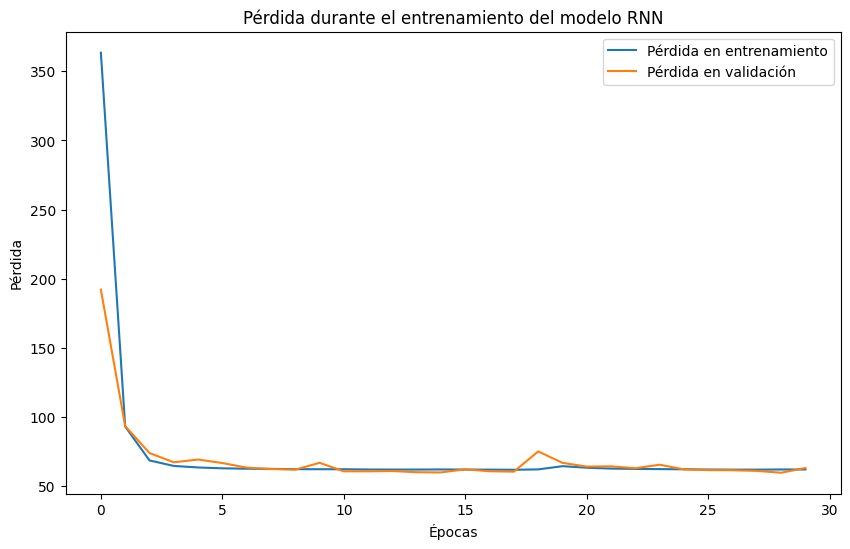

In [ ]:
# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10,6))
plt.plot(history_rnn.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history_rnn.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento del modelo RNN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Predicciones

Después del entrenamiento y el cálculo de las pérdidas durante el entrenamiento del modelo, este está listo para realizar predicciones sobre nuevos datos. Esto se logra al alimentar los datos de entrada al modelo entrenado y permitir que este genere predicciones para la variable objetivo. Las predicciones se comparan entonces con los valores reales para evaluar la precisión del modelo. Este proceso permite evaluar cómo se desempeña el modelo en datos que no ha visto durante el entrenamiento y determinar su capacidad para generalizar y hacer predicciones precisas en situaciones del mundo real.

In [ ]:
# Realizar predicciones
train_predictions_rnn = model_rnn.predict(X_train)
val_predictions_rnn = model_rnn.predict(X_val)
test_predictions_rnn = model_rnn.predict(X_test)

121/121 [==============================] - 0s 2ms/step


# Metricas de evaluación

Las métricas de evaluación en redes neuronales recurrentes (RNN) se utilizan para medir el rendimiento del modelo en la tarea para la que fue entrenado. Estas métricas proporcionan una forma objetiva de evaluar qué tan bien está funcionando el modelo en comparación con los datos reales.

En el contexto del notebook mencionado, las métricas utilizadas son:

RMSE, RSE, MAE y R^2

#RMSE

RMSE (Root Mean Squared Error): Mide la raíz cuadrada del error cuadrático medio entre las predicciones del modelo y los valores reales. Es útil para tener una idea de la magnitud del error en las predicciones.

In [ ]:
# Calcular el error cuadrático medio en los conjuntos de entrenamiento, prueba y validación
train_rmse_rnn = np.sqrt(mean_squared_error(y_train, train_predictions_rnn))
val_rmse_rnn = np.sqrt(mean_squared_error(y_val, val_predictions_rnn))
test_rmse_rnn = np.sqrt(mean_squared_error(y_test, test_predictions_rnn))

# Imprimir los resultados
print("RMSE en conjunto de entrenamiento (RNN):", train_rmse_rnn)
print("RMSE en conjunto de validación (RNN):", val_rmse_rnn)
print("RMSE en conjunto de prueba (RNN):", test_rmse_rnn)

RMSE en conjunto de entrenamiento (RNN): 7.890783486810553
RMSE en conjunto de validación (RNN): 7.950258961671018
RMSE en conjunto de prueba (RNN): 7.82152018034551


#RSE

RSE (Residual Standard Error): Es similar al RMSE pero se calcula en el contexto del modelo de regresión. Mide la desviación estándar de los residuos (diferencias entre los valores observados y predichos).

In [ ]:
# Calcule el error cuadrático medio (MSE) para conjuntos de entrenamiento, validación y prueba
train_mse_rnn = mean_squared_error(y_train, train_predictions_rnn)
val_mse_rnn = mean_squared_error(y_val, val_predictions_rnn)
test_mse_rnn = mean_squared_error(y_test, test_predictions_rnn)

# imprimir los resultados del MSE
print("MSE en conjunto de entrenamiento (RNN):", train_mse_rnn)
print("MSE en conjunto de validación (RNN):", val_mse_rnn)
print("MSE en conjunto de prueba (RNN):", test_mse_rnn)

MSE en conjunto de entrenamiento (RNN): 62.2644640357221
MSE en conjunto de validación (RNN): 63.20661755763034
MSE en conjunto de prueba (RNN): 61.176177931552054


#MAE

MAE (Mean Absolute Error): Calcula el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. Es menos sensible a valores atípicos en comparación con el RMSE.

In [ ]:
# Calcular el error absoluto medio (MAE) para conjuntos de entrenamiento, validación y prueba
train_mae_rnn = mean_absolute_error(y_train, train_predictions_rnn)
val_mae_rnn = mean_absolute_error(y_val, val_predictions_rnn)
test_mae_rnn = mean_absolute_error(y_test, test_predictions_rnn)

# imprimir los resultados
print("MAE en conjunto de entrenamiento (RNN):", train_mae_rnn)
print("MAE en conjunto de validación (RNN):", val_mae_rnn)
print("MAE en conjunto de prueba (RNN):", test_mae_rnn)

MAE en conjunto de entrenamiento (RNN): 5.90120478430285
MAE en conjunto de validación (RNN): 5.97663722007219
MAE en conjunto de prueba (RNN): 5.793301242927189


#MAPE

El Error Porcentual Absoluto Medio (MAPE) es una medida común en la evaluación de modelos predictivos. Calcula el promedio de los errores porcentuales entre las predicciones y los valores reales. Este valor se expresa como un porcentaje y proporciona una medida de la precisión relativa del modelo. Sin embargo, el MAPE puede tener limitaciones en ciertos contextos de datos.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcular MAPE para conjuntos de entrenamiento, validación y prueba
train_mape_rnn = mean_absolute_percentage_error(y_train, train_predictions_rnn)
val_mape_rnn = mean_absolute_percentage_error(y_val, val_predictions_rnn)
test_mape_rnn = mean_absolute_percentage_error(y_test, test_predictions_rnn)

# Imprimir resultados
print("Mean Absolute Percentage Error en conjunto de entrenamiento (RNN):", train_mape_rnn)
print("Mean Absolute Percentage Error en conjunto de validación (RNN):", val_mape_rnn)
print("Mean Absolute Percentage Error en conjunto de prueba (RNN):", test_mape_rnn)

Mean Absolute Percentage Error en conjunto de entrenamiento (RNN): 24.958307017409005
Mean Absolute Percentage Error en conjunto de validación (RNN): 20.39294804416752
Mean Absolute Percentage Error en conjunto de prueba (RNN): 21.66379045380519


#R^2

R^2 (Coeficiente de determinación): Proporciona una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales. Es una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.

In [ ]:
# Calcular la puntuación R cuadrado (R²) para conjuntos de entrenamiento, validación y prueba
train_r2_score_rnn = r2_score(y_train, train_predictions_rnn)
val_r2_score_rnn = r2_score(y_val, val_predictions_rnn)
test_r2_score_rnn = r2_score(y_test, test_predictions_rnn)

# imprimir los resultados
print("R-squared score en conjunto de entrenamiento (RNN):", train_r2_score_rnn)
print("R-squared score en conjunto de validación (RNN):", val_r2_score_rnn)
print("R-squared score en conjunto de prueba (RNN):", test_r2_score_rnn)

R-squared score en conjunto de entrenamiento (RNN): 0.6578580427808867
R-squared score en conjunto de validación (RNN): 0.6807154465871983
R-squared score en conjunto de prueba (RNN): 0.5989342410926857


# Grafica de resultados

Graficar las predicciones del modelo proporciona una instantánea clara y concisa del rendimiento del mismo. Al observar cómo las predicciones se superponen con los datos de entrenamiento, validación y prueba, se puede inferir que el modelo ha captado efectivamente los patrones y tendencias presentes en los datos. Además, al incluir la predicción de un nuevo dato en la gráfica, y ver su cercanía con los datos reales, se sugiere que el modelo ha aprendido de manera sólida y generaliza bien incluso en datos no vistos previamente, indicando un buen rendimiento en la predicción de nuevos datos.

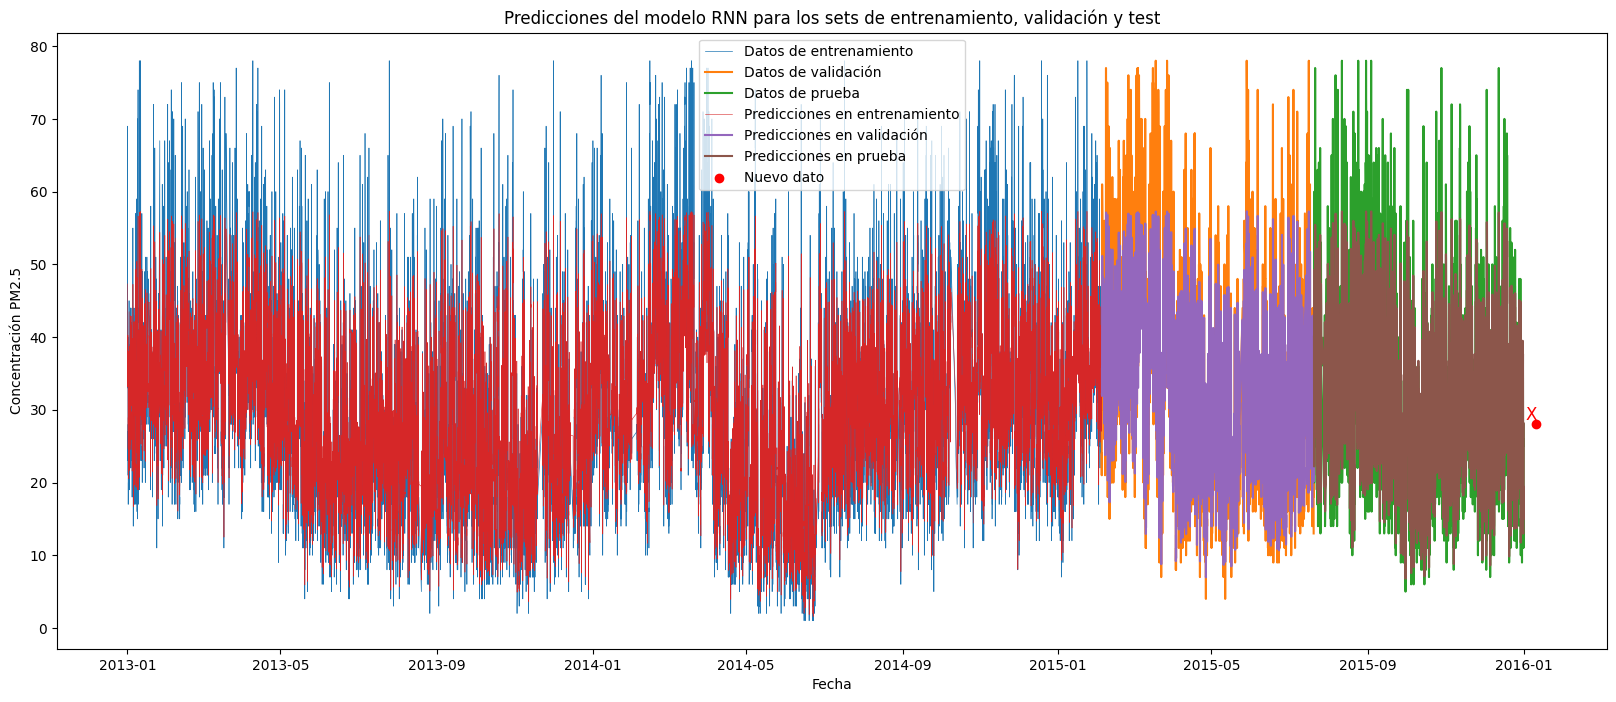

In [ ]:
# Graficar resultados
plt.figure(figsize=(20, 8))

# Datos de entrenamiento
plt.plot(data.index[:train_size], data['PM2.5'][:train_size], label='Datos de entrenamiento', linewidth=0.5)

# Datos de validación
plt.plot(data.index[train_size:train_size+val_size], data['PM2.5'][train_size:train_size+val_size], label='Datos de validación')

# Datos de prueba
plt.plot(data.index[train_size+val_size:], data['PM2.5'][train_size+val_size:], label='Datos de prueba')

# Predicciones en entrenamiento
plt.plot(data.index[seq_length:train_size], train_predictions_rnn, label='Predicciones en entrenamiento', linewidth=0.4)

# Predicciones en validación
plt.plot(data.index[train_size+seq_length:train_size+val_size], val_predictions_rnn, label='Predicciones en validación')

# Predicciones en prueba
plt.plot(data.index[train_size+val_size+seq_length:], test_predictions_rnn, label='Predicciones en prueba')

# Añadir el nuevo dato para predicción
new_date = data.index[-1] + pd.DateOffset(days=10) ##Definir el numero de dias a pronosticar
plt.scatter(new_date, test_predictions_rnn[-1], color='red', label='Nuevo dato', zorder=5)
plt.text(new_date, test_predictions_rnn[-1], 'X', color='red', fontsize=12, ha='right', va='bottom')

plt.title('Predicciones del modelo RNN para los sets de entrenamiento, validación y test')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.legend()
plt.show()

1/1 [==============================] - 0s 34ms/step


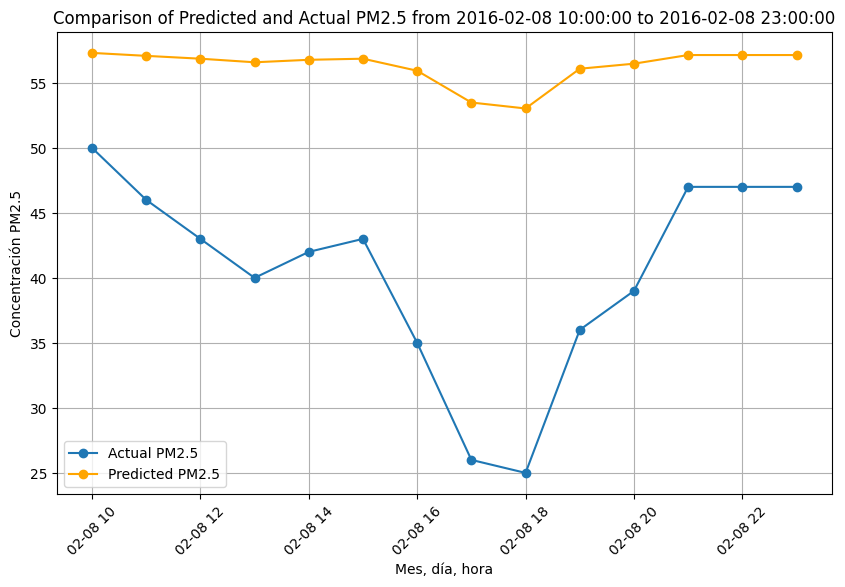

In [ ]:
start_date_new = '2016-02-08 10:00:00'  # Fecha de inicio ajustada para nuevos datos
end_date_new = '2016-02-08 23:00:00'    # Fecha de fin ajustada para nuevos datos

# Convertir el índice de df2 a datetime si aún no lo está
df2.index = pd.to_datetime(df2.index)

# Utilizar loc para seleccionar filas dentro del rango de fechas para los nuevos datos
X_new_dates = df2.loc[(df2.index >= start_date_new) & (df2.index <= end_date_new)]

# Comprobar si los datos seleccionados no están vacíos
if X_new_dates.empty:
    print("Error: No data found within the specified date range.")
else:
    # Utilizar el modelo entrenado para hacer predicciones
    # (Suponiendo que model_rnn es tu modelo entrenado)
    predictions = model_rnn.predict(X_new_dates)

    # Graficar tanto los valores reales de PM2.5 como los valores pronosticados
    plt.figure(figsize=(10, 6))
    plt.plot(X_new_dates.index, X_new_dates['PM2.5'], marker='o', linestyle='-', label='Actual PM2.5')
    plt.plot(X_new_dates.index, predictions, marker='o', linestyle='-', color='orange', label='Predicted PM2.5')
    plt.title('Comparison of Predicted and Actual PM2.5 from {} to {}'.format(start_date_new, end_date_new))
    plt.xlabel('Mes, día, hora')
    plt.ylabel('Concentración PM2.5')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

Conectar con WANDB

In [ ]:
#Instalar Wandb y Autenticarse
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
#Autenticación
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project='calidad-del-aire-medellin', entity='manteneafit', name='rnn_model')


wandb: Currently logged in as: ingmanuelandradef (manteneafit). Use `wandb login --relogin` to force relogin


In [ ]:
!pip install --upgrade wandb

In [ ]:
from wandb.integration.keras import WandbCallback

In [ ]:
# Configuracion y compilacion del modelo
model_rnn = Sequential([
    SimpleRNN(8, input_shape=(seq_length, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo con WandbCallback
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=30, batch_size=5, verbose=1,
                            callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
3605/3610 [============================>.] - ETA: 0s - loss: 455.6247

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 66s 16ms/step - loss: 455.1446 - val_loss: 257.7063
Epoch 2/30
3600/3610 [============================>.] - ETA: 0s - loss: 115.3235

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 25s 7ms/step - loss: 115.2108 - val_loss: 110.9708
Epoch 3/30
3608/3610 [============================>.] - ETA: 0s - loss: 73.8598

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 15s 4ms/step - loss: 73.8440 - val_loss: 80.3888
Epoch 4/30
3602/3610 [============================>.] - ETA: 0s - loss: 66.4581

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 15s 4ms/step - loss: 66.5491 - val_loss: 71.7265
Epoch 5/30
3609/3610 [============================>.] - ETA: 0s - loss: 64.6148

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 16s 4ms/step - loss: 64.6092 - val_loss: 68.3105
Epoch 6/30
3607/3610 [============================>.] - ETA: 0s - loss: 63.7334

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 18s 5ms/step - loss: 63.7023 - val_loss: 65.5865
Epoch 7/30
3597/3610 [============================>.] - ETA: 0s - loss: 63.3618

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 22s 6ms/step - loss: 63.3447 - val_loss: 64.1828
Epoch 8/30
3595/3610 [============================>.] - ETA: 0s - loss: 63.0696

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 16s 4ms/step - loss: 63.0552 - val_loss: 63.0865
Epoch 9/30
3597/3610 [============================>.] - ETA: 0s - loss: 62.8431

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 16s 4ms/step - loss: 62.8561 - val_loss: 62.7842
Epoch 10/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.7890 - val_loss: 62.8909
Epoch 11/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.7562 - val_loss: 65.0405
Epoch 12/30
3610/3610 [==============================] - 13s 4ms/step - loss: 62.4609 - val_loss: 63.9077
Epoch 13/30
3610/3610 [==============================] - 16s 5ms/step - loss: 62.4229 - val_loss: 64.2071
Epoch 14/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.4892 - val_loss: 65.5384
Epoch 15/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.4029 - val_loss: 63.3699
Epoch 16/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.2790 - val_loss: 64.3148
Epoch 17/30
3602/3610 [============================>.] - ETA: 0s - loss: 62.2787

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 16s 4ms/step - loss: 62.2906 - val_loss: 61.0252
Epoch 18/30
3600/3610 [============================>.] - ETA: 0s - loss: 62.2507

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_032512-v1uc82lg/files/model-best)... Done. 0.0s


3610/3610 [==============================] - 19s 5ms/step - loss: 62.2351 - val_loss: 60.3488
Epoch 19/30
3610/3610 [==============================] - 17s 5ms/step - loss: 62.2526 - val_loss: 61.0754
Epoch 20/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.1472 - val_loss: 62.6090
Epoch 21/30
3610/3610 [==============================] - 15s 4ms/step - loss: 62.2028 - val_loss: 61.0898
Epoch 22/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.2216 - val_loss: 61.4303
Epoch 23/30
3610/3610 [==============================] - 14s 4ms/step - loss: 62.0945 - val_loss: 62.6499
Epoch 24/30
3610/3610 [==============================] - 19s 5ms/step - loss: 62.1251 - val_loss: 60.8586
Epoch 25/30
3610/3610 [==============================] - 19s 5ms/step - loss: 62.1479 - val_loss: 62.8963
Epoch 26/30
3610/3610 [==============================] - 24s 7ms/step - loss: 61.9267 - val_loss: 64.8214
Epoch 27/30
3610/3610 [==============================] - 1

Preparar el Modelo para Hugging Face

In [ ]:
# Guarda el modelo en formato HDF5
model_rnn.save("rnn_model_pm25.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Configurar Git

In [ ]:
!git config --global user.email "ingmanuelandradef@gmail.com"
!git config --global user.name "ManCD"

**Clonar** y Preparar el Repositorio

In [ ]:
from huggingface_hub import Repository

# Asegúrate de cambiar esto al nombre correcto del nuevo repositorio y el modelo RNN
repo_url = "https://huggingface.co/ManCD/rnn_pm25_model"
local_dir = "rnn_pm25_model"

# Clonar el repositorio si no existe localmente
try:
    repo = Repository(local_dir=local_dir, clone_from=repo_url)
    print("Repositorio clonado exitosamente.")
except Exception as e:
    print(e)
    print("Repositorio ya clonado. Asegúrate de hacer pull de los últimos cambios con repo.git_pull().")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
 

'email'
Repositorio ya clonado. Asegúrate de hacer pull de los últimos cambios con repo.git_pull().


Subir el Modelo RNN al Repositorio

In [ ]:
# Cambiar a la carpeta del repositorio y copiar el modelo
!cp rnn_model_pm25.h5 {local_dir}/

# Cambiar al directorio del repositorio para hacer commit y push
import os
os.chdir(local_dir)
!git add .
!git commit -m "Add RNN model for PM2.5 prediction"
!git push

[main 2b37531] Add RNN model for PM2.5 prediction
 1 file changed, 3 insertions(+)
 create mode 100644 rnn_model_pm25.h5
batch response: Authorization error.
error: failed to push some refs to 'https://huggingface.co/ManCD/rnn_pm25_model'
